In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [39]:
df = pd.read_csv('graph.csv', sep=';')
df.head()

,Year,Land_Annual
0,1880,-0.62
1,1881,-0.41
2,1882,-0.50
3,1883,-0.59
4,1884,-0.86


In [33]:
import os
os.getcwd()

'C:\\Users\\dina ouahbi'

In [34]:
df.reset_index(drop=True, inplace=True)

Text(0.5, 1.0, 'variation de Temperature')

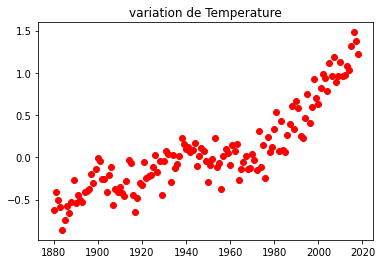

In [40]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
plt.scatter(x,y,color='red')
plt.title('variation de Temperature')

In [41]:
#surnomer le model
model1 = LinearRegression()

In [42]:
#entrainer le model
model1.fit(X, y)

LinearRegression()

In [43]:
#tester le model sur les donner X 
y_pred = model1.predict(X)

In [51]:
#transformation en format liste
y = list(y)
y_pred = list(y_pred)

In [55]:
#ziper y et y_pred pour pouvoir facilement les comparer
merge =set(zip(y, y_pred))
merge


{(-0.86, -0.6297571383886691),
 (-0.74, -0.6188621475490415),
 (-0.66, -0.5970721658697897),
 (-0.65, -0.2702224406809961),
 (-0.62, -0.6733371017471725),
 (-0.59, -0.6406521292282932),
 (-0.58, -0.6079671567094138),
 (-0.57, -0.3791723490772583),
 (-0.54, -0.5643871933509104),
 (-0.53, -0.5861771750301621),
 (-0.53, -0.531702220832031),
 (-0.51, -0.5425972116716551),
 (-0.5, -0.6515471200679208),
 (-0.48, -0.25932744984136846),
 (-0.46, -0.3246973948791272),
 (-0.45, -0.5534922025112827),
 (-0.45, -0.2811174315206202),
 (-0.45, -0.13948255060547865),
 (-0.42, -0.3355923857187548),
 (-0.41, -0.6624421109075449),
 (-0.41, -0.5208072299924034),
 (-0.41, -0.41185732159613764),
 (-0.41, -0.35738236739800655),
 (-0.4, -0.5099122391527757),
 (-0.38, 0.15468220206443561),
 (-0.37, -0.49901724831315164),
 (-0.37, -0.3682773582376342),
 (-0.35, -0.3464873765583789),
 (-0.33, -0.23753746816211674),
 (-0.31, -0.24843245900174082),
 (-0.3, -0.47722726663389636),
 (-0.29, -0.09590258724697165),
 (-

In [57]:
#calculer le score
scoring = r2_score(y, y_pred)
scoring

0.7612382660441059

Text(0.5, 1.0, 'Linear_Reg => r2_score : 0.7612382660441059')

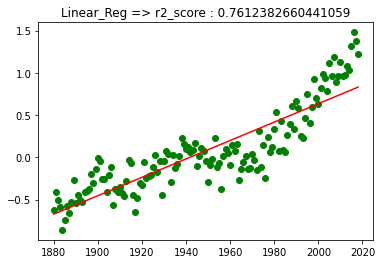

In [76]:
#tracer le model
plt.scatter(X, y, color='green')
plt.plot(X, y_pred, color='red')
plt.title('Linear_Reg => r2_score : 0.7612382660441059')

###regression polynomial

In [65]:
from sklearn.preprocessing import PolynomialFeatures
# transformer nos donnees X a un degree 3
poly_reg = PolynomialFeatures(degree = 3)
X_poly =  poly_reg.fit_transform(X)

In [68]:
model2 = LinearRegression()
model2.fit(X_poly, y)

LinearRegression()

In [71]:
y_pred2 = model2.predict(X_poly)
scoring2 = r2_score(y, y_pred2)
scoring2

0.8835769372123712

Text(0.5, 1.0, 'Polynomial_Regression => r2_score : 0.8835769372123712')

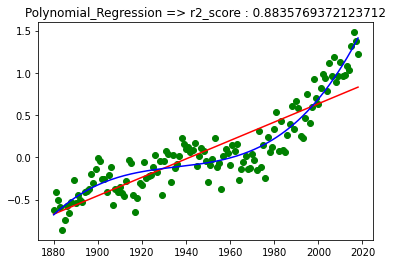

In [77]:
#tracer le model1 et 2
plt.scatter(X, y, color='green')
plt.plot(X, y_pred, color='red')
plt.plot(X, y_pred2, color='blue')
plt.title('Polynomial_Regression => r2_score : 0.8835769372123712')

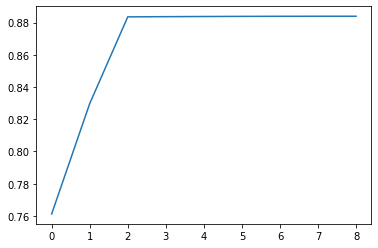

In [85]:
liste = []
for s in range(1,10):
    poly_reg = PolynomialFeatures(degree = s)
    X_poly =  poly_reg.fit_transform(X)
    model2 = LinearRegression()
    model2.fit(X_poly, y)
    y_pred2 = model2.predict(X_poly)
    scoring2 = r2_score(y, y_pred2)
    liste.append(scoring2)
plt.plot(liste)


In [86]:
#d'apres la coubre il ya donc une limite a l'apprentissage

In [98]:
annee = np.array([2021, 2022, 2023, 2024, 2025, 2026])
prediction = poly_reg.fit_transform([[2021], [2022], [2023], [2024], [2025], [2026]])
temp = model2.predict(prediction)
temp

array([1.60504775, 1.6636514 , 1.72375245, 1.78537519, 1.8485441 ,
       1.91328381])

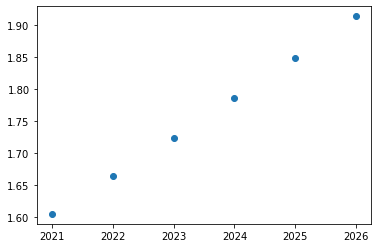

In [97]:
plt.scatter(annee, temp)